In [1]:
import pandas as pd
import re
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from nltk.corpus import stopwords

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
db = pd.read_csv ("c:\\Users\\Hp\\Downloads\\BINAR-DSC-14\\Data Challenge Gold\\data.csv",encoding='latin1')
db

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
db.head ()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [4]:
db.tail()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0


In [5]:
db.shape

(13169, 13)

In [6]:
db.duplicated().sum()

125

In [7]:
db = db.drop_duplicates()

In [8]:
db.duplicated().sum()

0

In [9]:
db ['is_duplicate'] = db.duplicated (subset = None, keep = False)

db [db.is_duplicate == True].sort_values('Tweet')

C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\1177966064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db ['is_duplicate'] = db.duplicated (subset = None, keep = False)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,is_duplicate


In [10]:
db.isna()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,is_duplicate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13165,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13166,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13167,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
db.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
is_duplicate     0
dtype: int64

In [12]:
db.isna().sum()/db.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
is_duplicate     0.0
dtype: float64

In [13]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13044 entries, 0 to 13168
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13044 non-null  object
 1   HS             13044 non-null  int64 
 2   Abusive        13044 non-null  int64 
 3   HS_Individual  13044 non-null  int64 
 4   HS_Group       13044 non-null  int64 
 5   HS_Religion    13044 non-null  int64 
 6   HS_Race        13044 non-null  int64 
 7   HS_Physical    13044 non-null  int64 
 8   HS_Gender      13044 non-null  int64 
 9   HS_Other       13044 non-null  int64 
 10  HS_Weak        13044 non-null  int64 
 11  HS_Moderate    13044 non-null  int64 
 12  HS_Strong      13044 non-null  int64 
 13  is_duplicate   13044 non-null  bool  
dtypes: bool(1), int64(12), object(1)
memory usage: 1.4+ MB


Cleansing 

In [14]:
result = string.punctuation
print (result)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [15]:
def Clean (text):
    text = re.sub(r'USER',' ', text)
    text = re.sub (r'RT',' ' , text)
    text = re.sub (r'URL',' ' , text)
    text = re.sub (r'\\[a-zA-Z0-9]+',' ' , text)
    text = re.sub (r'[0-9]',' ' , text)
    text = ''.join([char for char in text if char not in string.punctuation])
    text = text.lower ()
    return text

db['Tweet_Clear'] = db['Tweet'].apply(lambda x: Clean(x))
db.head(10)

C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\2934561212.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['Tweet_Clear'] = db['Tweet'].apply(lambda x: Clean(x))


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,is_duplicate,Tweet_Clear
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,False,disaat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,False,siapa yang telat ngasih tau eluedan sara...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,False,kadang aku berfikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,False,aku itu aku tau matamu sipit tapi diliat...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,False,kaum cebong kapir udah keliatan dongoknya ...
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0,False,ya bani taplak dkk
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0,False,deklarasi pilkada aman dan anti hoax warg...
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0,False,gue baru aja kelar rewatch aldnoah zero paling...
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0,False,nah admin belanja satu lagi port terbaik nak m...
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0,False,enak lg klo smbil ngewe


TOKENIZE

In [16]:
from nltk.tokenize import RegexpTokenizer 
regexp = RegexpTokenizer(r'\w+|$[0-9]+|\S+')
db['Token'] = db ['Tweet_Clear'].apply(regexp.tokenize)
db.head(50)

C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\3619126697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['Token'] = db ['Tweet_Clear'].apply(regexp.tokenize)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,is_duplicate,Tweet_Clear,Token
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,False,disaat semua cowok berusaha melacak perhatian...,"[disaat, semua, cowok, berusaha, melacak, perh..."
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,False,siapa yang telat ngasih tau eluedan sara...,"[siapa, yang, telat, ngasih, tau, eluedan, sar..."
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,False,kadang aku berfikir kenapa aku tetap percay...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,False,aku itu aku tau matamu sipit tapi diliat...,"[aku, itu, aku, tau, matamu, sipit, tapi, dili..."
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,False,kaum cebong kapir udah keliatan dongoknya ...,"[kaum, cebong, kapir, udah, keliatan, dongokny..."
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0,False,ya bani taplak dkk,"[ya, bani, taplak, dkk]"
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0,False,deklarasi pilkada aman dan anti hoax warg...,"[deklarasi, pilkada, aman, dan, anti, hoax, wa..."
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0,False,gue baru aja kelar rewatch aldnoah zero paling...,"[gue, baru, aja, kelar, rewatch, aldnoah, zero..."
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0,False,nah admin belanja satu lagi port terbaik nak m...,"[nah, admin, belanja, satu, lagi, port, terbai..."
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0,False,enak lg klo smbil ngewe,"[enak, lg, klo, smbil, ngewe]"


NORMALIZED

In [17]:
normalized_word = pd.read_csv("C:\\Users\\Hp\\Downloads\\BINAR-DSC-14\\Data Challenge Gold\\new_kamusalay.csv", encoding='latin1')

normalized_word_dict={}
for index, row in normalized_word.iterrows():
    if row [0] not in normalized_word_dict :
        normalized_word_dict[row[0]] = row [1]
def normalized_term (document) :
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document] 

db ['Normalisasi'] = db ['Token'].apply(normalized_term)
db ["Normalisasi"]=db["Normalisasi"].str.join(sep=" ")
db.head(50)

C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\755715459.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row [0] not in normalized_word_dict :
C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\755715459.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_word_dict[row[0]] = row [1]


C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\755715459.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db ['Normalisasi'] = db ['Token'].apply(normalized_term)
C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\755715459.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db ["Normalisasi"]=db["Normalisasi"].str.join(sep=" ")


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,is_duplicate,Tweet_Clear,Token,Normalisasi
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,False,disaat semua cowok berusaha melacak perhatian...,"[disaat, semua, cowok, berusaha, melacak, perh...",di saat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,False,siapa yang telat ngasih tau eluedan sara...,"[siapa, yang, telat, ngasih, tau, eluedan, sar...",siapa yang telat memberi tau eluedan sarap gue...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,False,kadang aku berfikir kenapa aku tetap percay...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...",kadang aku berpikir kenapa aku tetap percaya p...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,False,aku itu aku tau matamu sipit tapi diliat...,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...",aku itu aku tau matamu sipit tapi dilihat dari...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,False,kaum cebong kapir udah keliatan dongoknya ...,"[kaum, cebong, kapir, udah, keliatan, dongokny...",kaum cebong kafir sudah kelihatan dongoknya da...
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0,False,ya bani taplak dkk,"[ya, bani, taplak, dkk]",ya bani taplak dan kawan kawan
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0,False,deklarasi pilkada aman dan anti hoax warg...,"[deklarasi, pilkada, aman, dan, anti, hoax, wa...",deklarasi pilihan kepala daerah aman dan anti ...
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0,False,gue baru aja kelar rewatch aldnoah zero paling...,"[gue, baru, aja, kelar, rewatch, aldnoah, zero...",gue baru saja selesai rewatch aldnoah zero pal...
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0,False,nah admin belanja satu lagi port terbaik nak m...,"[nah, admin, belanja, satu, lagi, port, terbai...",nah admin belanja satu lagi port terbaik nak m...
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0,False,enak lg klo smbil ngewe,"[enak, lg, klo, smbil, ngewe]",enak lagi kalau sambil ngewe


STOPWORDS

In [18]:
list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah' , "hahaha", 'haha', 'gue', 'lo', 'lu', 'sok', 'gt', 'jk', 'g'])

list_stopwords = set(list_stopwords)

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

db["text_remove_stopwords"]= db['Token'].apply(stopwords_removal)

db["text_remove_stopwords"]=db["text_remove_stopwords"].str.join(sep=" ")

db

C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\4162828336.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["text_remove_stopwords"]= db['Token'].apply(stopwords_removal)
C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\4162828336.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["text_remove_stopwords"]=db["text_remove_stopwords"].str.join(sep=" ")


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,is_duplicate,Tweet_Clear,Token,Normalisasi,text_remove_stopwords
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,False,disaat semua cowok berusaha melacak perhatian...,"[disaat, semua, cowok, berusaha, melacak, perh...",di saat semua cowok berusaha melacak perhatian...,disaat cowok berusaha melacak perhatian loe la...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,False,siapa yang telat ngasih tau eluedan sara...,"[siapa, yang, telat, ngasih, tau, eluedan, sar...",siapa yang telat memberi tau eluedan sarap gue...,telat ngasih eluedan sarap bergaul cigax jifla...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,False,kadang aku berfikir kenapa aku tetap percay...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...",kadang aku berpikir kenapa aku tetap percaya p...,kadang berfikir percaya tuhan jatuh berkalikal...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,False,aku itu aku tau matamu sipit tapi diliat...,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...",aku itu aku tau matamu sipit tapi dilihat dari...,matamu sipit diliat
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,False,kaum cebong kapir udah keliatan dongoknya ...,"[kaum, cebong, kapir, udah, keliatan, dongokny...",kaum cebong kafir sudah kelihatan dongoknya da...,kaum cebong kapir udah keliatan dongoknya dong...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,False,jangan asal ngomong ndasmu congor lu yg seka...,"[jangan, asal, ngomong, ndasmu, congor, lu, yg...",jangan asal berbicara ndasmu congor kamu yang ...,ngomong ndasmu congor sekate anjyng
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,False,kasur mana enak kunyuk,"[kasur, mana, enak, kunyuk]",kasur mana enak kunyuk,kasur enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,False,hati hati bisu g bosan huft,"[hati, hati, bisu, g, bosan, huft]",hati hati bisu tidak bosan duh,hati hati bisu bosan huft
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,False,bom yang real mudah terdeteksi bom yan...,"[bom, yang, real, mudah, terdeteksi, bom, yang...",bom yang real mudah terdeteksi bom yang terkub...,bom real mudah terdeteksi bom terkubur dahsyat...


BUAT KOLOM TOTAL CHAR TOTAL WORD

In [19]:
db['Total_Char'] = db.text_remove_stopwords.apply(len)

C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\553068477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['Total_Char'] = db.text_remove_stopwords.apply(len)


In [20]:
db

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,is_duplicate,Tweet_Clear,Token,Normalisasi,text_remove_stopwords,Total_Char
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,False,disaat semua cowok berusaha melacak perhatian...,"[disaat, semua, cowok, berusaha, melacak, perh...",di saat semua cowok berusaha melacak perhatian...,disaat cowok berusaha melacak perhatian loe la...,107
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,False,siapa yang telat ngasih tau eluedan sara...,"[siapa, yang, telat, ngasih, tau, eluedan, sar...",siapa yang telat memberi tau eluedan sarap gue...,telat ngasih eluedan sarap bergaul cigax jifla...,62
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,False,kadang aku berfikir kenapa aku tetap percay...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...",kadang aku berpikir kenapa aku tetap percaya p...,kadang berfikir percaya tuhan jatuh berkalikal...,134
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,False,aku itu aku tau matamu sipit tapi diliat...,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...",aku itu aku tau matamu sipit tapi dilihat dari...,matamu sipit diliat,19
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,False,kaum cebong kapir udah keliatan dongoknya ...,"[kaum, cebong, kapir, udah, keliatan, dongokny...",kaum cebong kafir sudah kelihatan dongoknya da...,kaum cebong kapir udah keliatan dongoknya dong...,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,False,jangan asal ngomong ndasmu congor lu yg seka...,"[jangan, asal, ngomong, ndasmu, congor, lu, yg...",jangan asal berbicara ndasmu congor kamu yang ...,ngomong ndasmu congor sekate anjyng,35
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,False,kasur mana enak kunyuk,"[kasur, mana, enak, kunyuk]",kasur mana enak kunyuk,kasur enak kunyuk,17
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,False,hati hati bisu g bosan huft,"[hati, hati, bisu, g, bosan, huft]",hati hati bisu tidak bosan duh,hati hati bisu bosan huft,25
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,False,bom yang real mudah terdeteksi bom yan...,"[bom, yang, real, mudah, terdeteksi, bom, yang...",bom yang real mudah terdeteksi bom yang terkub...,bom real mudah terdeteksi bom terkubur dahsyat...,71


In [21]:
db["Total_Word"] = db.text_remove_stopwords.apply(lambda sent: len(sent.split()))
db

C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\919038283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["Total_Word"] = db.text_remove_stopwords.apply(lambda sent: len(sent.split()))


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,is_duplicate,Tweet_Clear,Token,Normalisasi,text_remove_stopwords,Total_Char,Total_Word
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,False,disaat semua cowok berusaha melacak perhatian...,"[disaat, semua, cowok, berusaha, melacak, perh...",di saat semua cowok berusaha melacak perhatian...,disaat cowok berusaha melacak perhatian loe la...,107,16
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,False,siapa yang telat ngasih tau eluedan sara...,"[siapa, yang, telat, ngasih, tau, eluedan, sar...",siapa yang telat memberi tau eluedan sarap gue...,telat ngasih eluedan sarap bergaul cigax jifla...,62,10
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,False,kadang aku berfikir kenapa aku tetap percay...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...",kadang aku berpikir kenapa aku tetap percaya p...,kadang berfikir percaya tuhan jatuh berkalikal...,134,17
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,False,aku itu aku tau matamu sipit tapi diliat...,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...",aku itu aku tau matamu sipit tapi dilihat dari...,matamu sipit diliat,19,3
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,False,kaum cebong kapir udah keliatan dongoknya ...,"[kaum, cebong, kapir, udah, keliatan, dongokny...",kaum cebong kafir sudah kelihatan dongoknya da...,kaum cebong kapir udah keliatan dongoknya dong...,56,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,False,jangan asal ngomong ndasmu congor lu yg seka...,"[jangan, asal, ngomong, ndasmu, congor, lu, yg...",jangan asal berbicara ndasmu congor kamu yang ...,ngomong ndasmu congor sekate anjyng,35,5
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,False,kasur mana enak kunyuk,"[kasur, mana, enak, kunyuk]",kasur mana enak kunyuk,kasur enak kunyuk,17,3
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,False,hati hati bisu g bosan huft,"[hati, hati, bisu, g, bosan, huft]",hati hati bisu tidak bosan duh,hati hati bisu bosan huft,25,5
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,False,bom yang real mudah terdeteksi bom yan...,"[bom, yang, real, mudah, terdeteksi, bom, yang...",bom yang real mudah terdeteksi bom yang terkub...,bom real mudah terdeteksi bom terkubur dahsyat...,71,10


In [22]:
db["split"] = db.text_remove_stopwords.apply(lambda x: x.split())
db

C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\1747699554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["split"] = db.text_remove_stopwords.apply(lambda x: x.split())


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,...,HS_Moderate,HS_Strong,is_duplicate,Tweet_Clear,Token,Normalisasi,text_remove_stopwords,Total_Char,Total_Word,split
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,...,0,0,False,disaat semua cowok berusaha melacak perhatian...,"[disaat, semua, cowok, berusaha, melacak, perh...",di saat semua cowok berusaha melacak perhatian...,disaat cowok berusaha melacak perhatian loe la...,107,16,"[disaat, cowok, berusaha, melacak, perhatian, ..."
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,...,0,0,False,siapa yang telat ngasih tau eluedan sara...,"[siapa, yang, telat, ngasih, tau, eluedan, sar...",siapa yang telat memberi tau eluedan sarap gue...,telat ngasih eluedan sarap bergaul cigax jifla...,62,10,"[telat, ngasih, eluedan, sarap, bergaul, cigax..."
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,...,0,0,False,kadang aku berfikir kenapa aku tetap percay...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...",kadang aku berpikir kenapa aku tetap percaya p...,kadang berfikir percaya tuhan jatuh berkalikal...,134,17,"[kadang, berfikir, percaya, tuhan, jatuh, berk..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,...,0,0,False,aku itu aku tau matamu sipit tapi diliat...,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...",aku itu aku tau matamu sipit tapi dilihat dari...,matamu sipit diliat,19,3,"[matamu, sipit, diliat]"
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,...,1,0,False,kaum cebong kapir udah keliatan dongoknya ...,"[kaum, cebong, kapir, udah, keliatan, dongokny...",kaum cebong kafir sudah kelihatan dongoknya da...,kaum cebong kapir udah keliatan dongoknya dong...,56,8,"[kaum, cebong, kapir, udah, keliatan, dongokny..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,...,0,0,False,jangan asal ngomong ndasmu congor lu yg seka...,"[jangan, asal, ngomong, ndasmu, congor, lu, yg...",jangan asal berbicara ndasmu congor kamu yang ...,ngomong ndasmu congor sekate anjyng,35,5,"[ngomong, ndasmu, congor, sekate, anjyng]"
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,...,0,0,False,kasur mana enak kunyuk,"[kasur, mana, enak, kunyuk]",kasur mana enak kunyuk,kasur enak kunyuk,17,3,"[kasur, enak, kunyuk]"
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,...,0,0,False,hati hati bisu g bosan huft,"[hati, hati, bisu, g, bosan, huft]",hati hati bisu tidak bosan duh,hati hati bisu bosan huft,25,5,"[hati, hati, bisu, bosan, huft]"
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,...,0,0,False,bom yang real mudah terdeteksi bom yan...,"[bom, yang, real, mudah, terdeteksi, bom, yang...",bom yang real mudah terdeteksi bom yang terkub...,bom real mudah terdeteksi bom terkubur dahsyat...,71,10,"[bom, real, mudah, terdeteksi, bom, terkubur, ..."


SENTIMENT

In [23]:
sentiments = SentimentIntensityAnalyzer()
db ['Positive'] = [sentiments.polarity_scores (i) ['pos'] for i in db ['text_remove_stopwords']]
db ['Negative'] = [sentiments.polarity_scores (i) ['neg'] for i in db ['text_remove_stopwords']]
db ['Compound'] = [sentiments.polarity_scores (i) ['compound'] for i in db ['text_remove_stopwords']]
db

C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\2373227848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db ['Positive'] = [sentiments.polarity_scores (i) ['pos'] for i in db ['text_remove_stopwords']]
C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\2373227848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db ['Negative'] = [sentiments.polarity_scores (i) ['neg'] for i in db ['text_remove_stopwords']]
C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\2373227848.py:4: SettingWithCopyWarning: 
A value i

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,...,Tweet_Clear,Token,Normalisasi,text_remove_stopwords,Total_Char,Total_Word,split,Positive,Negative,Compound
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,...,disaat semua cowok berusaha melacak perhatian...,"[disaat, semua, cowok, berusaha, melacak, perh...",di saat semua cowok berusaha melacak perhatian...,disaat cowok berusaha melacak perhatian loe la...,107,16,"[disaat, cowok, berusaha, melacak, perhatian, ...",0.0,0.0,0.0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,...,siapa yang telat ngasih tau eluedan sara...,"[siapa, yang, telat, ngasih, tau, eluedan, sar...",siapa yang telat memberi tau eluedan sarap gue...,telat ngasih eluedan sarap bergaul cigax jifla...,62,10,"[telat, ngasih, eluedan, sarap, bergaul, cigax...",0.0,0.0,0.0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,...,kadang aku berfikir kenapa aku tetap percay...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...",kadang aku berpikir kenapa aku tetap percaya p...,kadang berfikir percaya tuhan jatuh berkalikal...,134,17,"[kadang, berfikir, percaya, tuhan, jatuh, berk...",0.0,0.0,0.0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,...,aku itu aku tau matamu sipit tapi diliat...,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...",aku itu aku tau matamu sipit tapi dilihat dari...,matamu sipit diliat,19,3,"[matamu, sipit, diliat]",0.0,0.0,0.0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,...,kaum cebong kapir udah keliatan dongoknya ...,"[kaum, cebong, kapir, udah, keliatan, dongokny...",kaum cebong kafir sudah kelihatan dongoknya da...,kaum cebong kapir udah keliatan dongoknya dong...,56,8,"[kaum, cebong, kapir, udah, keliatan, dongokny...",0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,...,jangan asal ngomong ndasmu congor lu yg seka...,"[jangan, asal, ngomong, ndasmu, congor, lu, yg...",jangan asal berbicara ndasmu congor kamu yang ...,ngomong ndasmu congor sekate anjyng,35,5,"[ngomong, ndasmu, congor, sekate, anjyng]",0.0,0.0,0.0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,...,kasur mana enak kunyuk,"[kasur, mana, enak, kunyuk]",kasur mana enak kunyuk,kasur enak kunyuk,17,3,"[kasur, enak, kunyuk]",0.0,0.0,0.0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,...,hati hati bisu g bosan huft,"[hati, hati, bisu, g, bosan, huft]",hati hati bisu tidak bosan duh,hati hati bisu bosan huft,25,5,"[hati, hati, bisu, bosan, huft]",0.0,0.0,0.0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,...,bom yang real mudah terdeteksi bom yan...,"[bom, yang, real, mudah, terdeteksi, bom, yang...",bom yang real mudah terdeteksi bom yang terkub...,bom real mudah terdeteksi bom terkubur dahsyat...,71,10,"[bom, real, mudah, terdeteksi, bom, terkubur, ...",0.0,0.0,0.0


In [24]:
score = db ['Compound'].values
sentiment = []
for i in score :
    if i >= 0.05 :
        sentiment.append('positif')
    else :
        sentiment.append('negatif')
db ['Sentiment'] = sentiment
db

C:\Users\Hp\AppData\Local\Temp\ipykernel_21436\3803567021.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db ['Sentiment'] = sentiment


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,...,Token,Normalisasi,text_remove_stopwords,Total_Char,Total_Word,split,Positive,Negative,Compound,Sentiment
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,...,"[disaat, semua, cowok, berusaha, melacak, perh...",di saat semua cowok berusaha melacak perhatian...,disaat cowok berusaha melacak perhatian loe la...,107,16,"[disaat, cowok, berusaha, melacak, perhatian, ...",0.0,0.0,0.0,negatif
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,...,"[siapa, yang, telat, ngasih, tau, eluedan, sar...",siapa yang telat memberi tau eluedan sarap gue...,telat ngasih eluedan sarap bergaul cigax jifla...,62,10,"[telat, ngasih, eluedan, sarap, bergaul, cigax...",0.0,0.0,0.0,negatif
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...",kadang aku berpikir kenapa aku tetap percaya p...,kadang berfikir percaya tuhan jatuh berkalikal...,134,17,"[kadang, berfikir, percaya, tuhan, jatuh, berk...",0.0,0.0,0.0,negatif
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,...,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...",aku itu aku tau matamu sipit tapi dilihat dari...,matamu sipit diliat,19,3,"[matamu, sipit, diliat]",0.0,0.0,0.0,negatif
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,...,"[kaum, cebong, kapir, udah, keliatan, dongokny...",kaum cebong kafir sudah kelihatan dongoknya da...,kaum cebong kapir udah keliatan dongoknya dong...,56,8,"[kaum, cebong, kapir, udah, keliatan, dongokny...",0.0,0.0,0.0,negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,...,"[jangan, asal, ngomong, ndasmu, congor, lu, yg...",jangan asal berbicara ndasmu congor kamu yang ...,ngomong ndasmu congor sekate anjyng,35,5,"[ngomong, ndasmu, congor, sekate, anjyng]",0.0,0.0,0.0,negatif
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,...,"[kasur, mana, enak, kunyuk]",kasur mana enak kunyuk,kasur enak kunyuk,17,3,"[kasur, enak, kunyuk]",0.0,0.0,0.0,negatif
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,...,"[hati, hati, bisu, g, bosan, huft]",hati hati bisu tidak bosan duh,hati hati bisu bosan huft,25,5,"[hati, hati, bisu, bosan, huft]",0.0,0.0,0.0,negatif
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,...,"[bom, yang, real, mudah, terdeteksi, bom, yang...",bom yang real mudah terdeteksi bom yang terkub...,bom real mudah terdeteksi bom terkubur dahsyat...,71,10,"[bom, real, mudah, terdeteksi, bom, terkubur, ...",0.0,0.0,0.0,negatif


In [25]:
db_filterp = db[db['Sentiment'] == 'positif']
db_filterp = db_filterp[["text_remove_stopwords", "Sentiment"]]
db_filterp

,text_remove_stopwords,Sentiment
7,kelar rewatch aldnoah zero kampret emang endin...,positif
48,kau pendikan bodohgk larang bawa agamabiar ora...,positif
49,btp the best abaikan kaum kampret otak micin,positif
55,provokasi mayat politisasi agama penyebab keka...,positif
57,lol bani lowo,positif
...,...,...
12907,tp please putus asa badan kamuu prinsip cewe g...,positif
12964,biarpun badan beliau kurus nyalinya mengembali...,positif
13001,indonesia bs lolos piala dunia contohlah peran...,positif
13100,ulama dukung cakiminthenextwapres join,positif


In [26]:
db_filtern = db[db['Sentiment'] == 'negatif']
db_filtern = db_filtern[["text_remove_stopwords", "Sentiment"]]
db_filtern

,text_remove_stopwords,Sentiment
0,disaat cowok berusaha melacak perhatian loe la...,negatif
1,telat ngasih eluedan sarap bergaul cigax jifla...,negatif
2,kadang berfikir percaya tuhan jatuh berkalikal...,negatif
3,matamu sipit diliat,negatif
4,kaum cebong kapir udah keliatan dongoknya dong...,negatif
...,...,...
13164,ngomong ndasmu congor sekate anjyng,negatif
13165,kasur enak kunyuk,negatif
13166,hati hati bisu bosan huft,negatif
13167,bom real mudah terdeteksi bom terkubur dahsyat...,negatif


MEAN

In [27]:
db

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,...,Token,Normalisasi,text_remove_stopwords,Total_Char,Total_Word,split,Positive,Negative,Compound,Sentiment
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,...,"[disaat, semua, cowok, berusaha, melacak, perh...",di saat semua cowok berusaha melacak perhatian...,disaat cowok berusaha melacak perhatian loe la...,107,16,"[disaat, cowok, berusaha, melacak, perhatian, ...",0.0,0.0,0.0,negatif
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,...,"[siapa, yang, telat, ngasih, tau, eluedan, sar...",siapa yang telat memberi tau eluedan sarap gue...,telat ngasih eluedan sarap bergaul cigax jifla...,62,10,"[telat, ngasih, eluedan, sarap, bergaul, cigax...",0.0,0.0,0.0,negatif
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...",kadang aku berpikir kenapa aku tetap percaya p...,kadang berfikir percaya tuhan jatuh berkalikal...,134,17,"[kadang, berfikir, percaya, tuhan, jatuh, berk...",0.0,0.0,0.0,negatif
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,...,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...",aku itu aku tau matamu sipit tapi dilihat dari...,matamu sipit diliat,19,3,"[matamu, sipit, diliat]",0.0,0.0,0.0,negatif
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,...,"[kaum, cebong, kapir, udah, keliatan, dongokny...",kaum cebong kafir sudah kelihatan dongoknya da...,kaum cebong kapir udah keliatan dongoknya dong...,56,8,"[kaum, cebong, kapir, udah, keliatan, dongokny...",0.0,0.0,0.0,negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,...,"[jangan, asal, ngomong, ndasmu, congor, lu, yg...",jangan asal berbicara ndasmu congor kamu yang ...,ngomong ndasmu congor sekate anjyng,35,5,"[ngomong, ndasmu, congor, sekate, anjyng]",0.0,0.0,0.0,negatif
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,...,"[kasur, mana, enak, kunyuk]",kasur mana enak kunyuk,kasur enak kunyuk,17,3,"[kasur, enak, kunyuk]",0.0,0.0,0.0,negatif
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,...,"[hati, hati, bisu, g, bosan, huft]",hati hati bisu tidak bosan duh,hati hati bisu bosan huft,25,5,"[hati, hati, bisu, bosan, huft]",0.0,0.0,0.0,negatif
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,...,"[bom, yang, real, mudah, terdeteksi, bom, yang...",bom yang real mudah terdeteksi bom yang terkub...,bom real mudah terdeteksi bom terkubur dahsyat...,71,10,"[bom, real, mudah, terdeteksi, bom, terkubur, ...",0.0,0.0,0.0,negatif


In [28]:
db[["Total_Char", "Total_Word"].mean()]
db

AttributeError: 'list' object has no attribute 'mean'

In [ ]:
avg_char_per_category = db.groupby("Sentiment").agg({"Total_Char":["mean"]}).reset_index()
avg_char_per_category

,Sentiment,Total_Char
,,mean
0,negatif,68.212661
1,positif,96.272727


In [ ]:
avg_char_per_category = db.groupby("Sentiment").agg({"Total_Word":["mean"]}).reset_index()
avg_char_per_category

,Sentiment,Total_Word
,,mean
0,negatif,9.860461
1,positif,14.595745


MEDIAN

In [ ]:
db.median()

TypeError: Cannot convert [["- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'"
  "RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga'"
  '41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter'
  ...
  "USER Hati hati bisu :( .g\\n\\nlagi bosan huft \\xf0\\x9f\\x98\\xaa'"
  "USER USER USER USER Bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut Revolusi Jiwa'"
  'USER Mana situ ngasih(": itu cuma foto ya kutil onta\'']] to numeric

In [ ]:
median_char_per_category = db.groupby("Sentiment").agg({"Total_Char":["median"]}).reset_index()
median_char_per_category

,Sentiment,Total_Char
,,median
0,negatif,59.0
1,positif,91.0


In [ ]:
median_char_per_category = db.groupby("Sentiment").agg({"Total_Word":["median"]}).reset_index()
median_char_per_category

,Sentiment,Total_Word
,,median
0,negatif,9.0
1,positif,13.0


MODE

In [ ]:
db["Total_Char"].mode()

0    27
Name: Total_Char, dtype: int64

In [ ]:
db["Total_Word"].mode()

0    6
Name: Total_Word, dtype: int64

In [ ]:
mode_char_word_per_category = db.groupby("Sentiment").agg({"Total_Word":pd.Series.mode, "Total_Char":pd.Series.mode}).reset_index()
mode_char_word_per_category

ValueError: Must produce aggregated value

RANGE

In [ ]:
range_total_word = db.Total_Word.max() - db.Total_Word.min()
range_total_word

43

In [ ]:
db.Total_Word.max()

43

In [ ]:
db.Total_Word.min()

0

In [ ]:
range_total_char = db.Total_Char.max() - db.Total_Char.min()
range_total_char

264

In [ ]:
db.Total_Char.max()

264

In [ ]:
db.Total_Char.min()

0

In [ ]:
db.groupby("Sentiment").agg({"Total_Word":['min','max'], "Total_Char":['min','max']}).reset_index()

Sentiment Total_Word     Total_Char     
                   min max        min  max
0   negatif          0  43          0  264
1   positif          2  38         12  216

TOTAL CHAR

In [ ]:
p0 = db.Total_Char.min()
p0

0

In [ ]:
p100 = db.Total_Char.max()
p100

264

In [ ]:
q1 = db.Total_Char.quantile(0.25)
q1

34.0

In [ ]:
q2 = db.Total_Char.quantile(0.50)
q2

60.0

In [ ]:
q3 = db.Total_Char.quantile(0.75)
q3

95.0

In [ ]:
iqr = q3-q1
iqr

61.0

In [ ]:
lower_limit = q1-1.5*iqr
lower_limit

-57.5

In [ ]:
upper_limit = q3+1.5*iqr
upper_limit

186.5

In [ ]:
print("Batas bawah 'total_char': ", lower_limit)
print("Nilai minimum: ", p0)

if(lower_limit < p0):
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

Batas bawah 'total_char':  -57.5
Nilai minimum:  0
Tidak ada outlier dari sisi batas bawah


In [ ]:
print("Batas atas 'total_char': ", upper_limit)
print("Nilai maksimum: ", p100)

if(upper_limit > p100):
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas atas 'total_char':  186.5
Nilai maksimum:  264
Ada outlier dari sisi batas atas


TOTAL WORD

In [ ]:
p0 = db.Total_Word.min()

In [ ]:
p100 = db.Total_Word.max()

In [ ]:
q1 = db.Total_Word.quantile(0.25)

In [ ]:
q2 = db.Total_Word.quantile(0.50)

In [ ]:
q3 = db.Total_Word.quantile(0.75)

In [ ]:
iqr = q3-q1

In [ ]:
lower_limit = q1-1.5*iqr

In [ ]:
upper_limit = q3+1.5*iqr

In [ ]:
print("Batas bawah 'total_word': ", lower_limit)
print("Nilai minimum: ", p0)

if(lower_limit < p0):
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

Batas bawah 'total_word':  -8.5
Nilai minimum:  0
Tidak ada outlier dari sisi batas bawah


In [ ]:
print("Batas atas 'total_word': ", upper_limit)
print("Nilai maksimum: ", p100)

if(upper_limit > p100):
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas atas 'total_word':  27.5
Nilai maksimum:  43
Ada outlier dari sisi batas atas


In [ ]:
db_sentiment = db.groupby('Sentiment').Sentiment.count()
db_sentiment

Sentiment
negatif    12527
positif      517
Name: Sentiment, dtype: int64

<Axes: ylabel='Sentiment'>

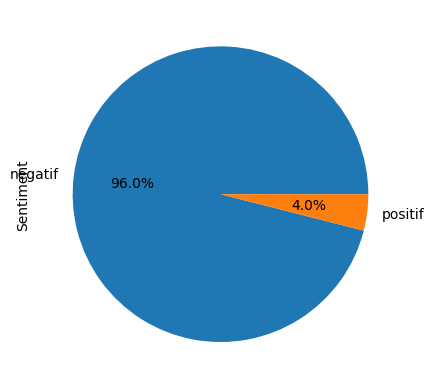

In [ ]:
db_sentiment.plot(kind='pie', autopct='%1.1f%%')

In [ ]:
text = ' '.join(db['text_remove_stopwords'])
wordcloud = WordCloud().generate(text)

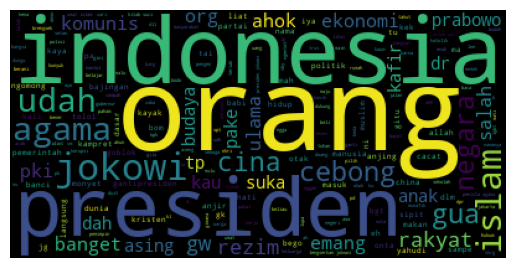

In [ ]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
text = ' '.join(db['text_remove_stopwords'][db.Sentiment=="negatif"])
wordcloud = WordCloud().generate(text)

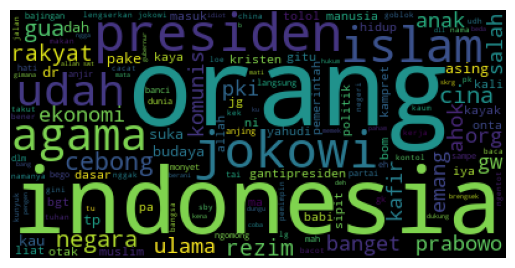

In [ ]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

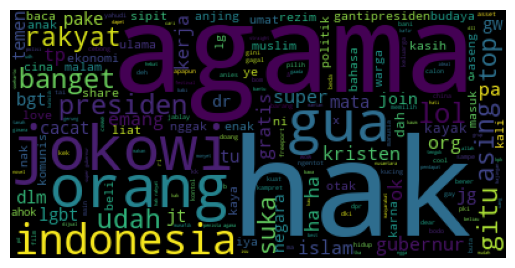

In [ ]:
text = ' '.join(db['text_remove_stopwords'][db.Sentiment=="positif"])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()